<a href="https://colab.research.google.com/github/ll-0013py/fft_study/blob/main/fft_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# はじめに

## このファイルの概要

こちらはフーリエ変換（Fourier Fransform）の原理について、実際のPythonのプログラミングコードを動作させながら学ぶことができるノートブックです。

今回主に扱っているデータは音声ファイルになります。お好きな音楽や音声ファイルをGoogleドライブにアップロードしてフーリエ変換をかけてみたり、スペクトログラムを描写して音声分析などをしてみることもできます。

## フーリエ変換とは何ぞや？って人へ

フーリエ変換というのは時間や空間における信号や波形を異なる周波数成分に分解することができる数学的手法時間のことで、具体的には領域の関数を（角）周波数領域の関数に変換して観察することができるようになります。

まあこれだけ聞いても何言ってんだコイツってなると思うのでここでフーリエ変換の説明も一緒にするつもりだったのですが、ちょっと長くなりそうだったので別のところに置いておくことにしました。これから何をするのかよく分からないという人はこちらを読んだうえでコードを触ってみるといいかもしれません。

## 動作方法（こちらのJupyter NotebookはGoogle Colab上での動作を想定しています）

基本的にはGoogle Colab上のそれぞれのコードブロックの実行ボタン（○の中に▷
が入っているボタン）を押すだけで実行できます。Pythonなどの動作環境をローカルに構築する必要はありません。

セルについては原則、上から順番に実行するようにしてください（変数の指定があるのでエラーが起きます）。毎回ボタンを押すのが面倒であれば、一番上のバーに表示されている<ランタイム>というボタンからすべてのセルを実行、などを選択して一括で実行することもできます。

このノートブックには3つのセクションがあり、それぞれの内容は以下の通りになっています。

** ライブラリなどの準備 **

このJupyter Notebookを動かすために必要になります。一部、高速フーリエ変換 サンプル版のセクションのみを実行したい人には実行が不要なセルもあります。

**高速フーリエ変換 サンプル版**

ご自身で好きなようにSin波、Cos波を生成して重ね合わせたり、その結果をFFTすることができます。

**高速フーリエ変換 実データ版**

好きな音声ファイルをGoogle Driveにアップロードし、音響分析を行うことができます。

**おまけ：音声の加工**

アップロードした音声ファイルのピッチや再生速度を変更して遊べます。

# ライブラリなどの準備

次に、音響信号処理でよく使うライブラリを紹介します。

下のセルも実行してライブラリをimportしておいてください。

1. **NumPy:** 数値計算や配列操作に特化したライブラリで、信号処理に広く使用される基本的なツールを提供します。

2. **SciPy:** 高度な科学技術計算機能を提供し、信号処理や最適化、統計処理などを含む幅広い機能が揃っています。

3. **Matplotlib:** グラフ描画ライブラリで、波形やスペクトログラムの可視化に利用されます。

4. **Librosa:** 音楽や音声解析のためのライブラリで、MFCC などを計算する機能があります。

5. **CIS (Continuous Indexing in Spectrograms):** 高速で効率的なスペクトログラム計算を提供するライブラリです。

6. **Wave:** 音声ファイルの読み込みや書き込みなど、基本的な音声処理に関する機能を提供するライブラリです。

7. **Pandas:** データの整理や処理に使われ、音声データの解析結果をまとめたり、複数のデータを結合するのに便利です。

8. **Dispy:** 信号処理やデジタル信号処理のためのライブラリです。

9. **Soundfile:** 音声ファイルの読み書きのためのライブラリで、WAV などの一般的なフォーマットに対応しています。

10. **PyTorch:** ニューラルネットワークの構築や訓練に使われ、音声の深層学習モデルの実装に広く利用されています。

11. **TensorFlow:** ニューラルネットワークの構築や訓練に使われ、音声の深層学習モデルの実装に広く利用されています。

12. **Keras:** 高水準のニューラルネットワーク API を提供し、TensorFlow や Theano をバックエンドとして使用します。音声認識や音声生成のモデル構築に便利です。

13. **Scikit-learn:** 機械学習や統計学のライブラリで、音声データの分類やクラスタリングなどのタスクに使用されます。

14. **OpenCV:** コンピュータビジョン関連の処理に特化したライブラリで、音声処理ではスペクトログラムの表示や画像処理に使用されることがあります。

In [ ]:
# print('必要なライブラリをインポートしています。')
import wave

import IPython.display as disp
import librosa as lr
import librosa.display as libdisp
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.io import wavfile
import scipy.signal as signal
from scipy.io.wavfile import read


is_y = " はい:y いいえ:その他のキーを入力してください。 >>>"


次に、Google Driveとこのipynbの結び付け（マウント）を行います。下のセルを実行してください。

**高速フーリエ変換 実データ版**か**おまけ：音声の加工**を使用したい人はこちらのセルを実行してください。**高速フーリエ変換 サンプル版**しか実行しない人はスキップしてもらって大丈夫です。

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


取り扱いたいファイルのPathを通します。

1. 事前に音声ファイルはお手持ちのGoogle Driveにアップロードしておく。
2. 左のバーにあるファイルアイコン > content > drive > MyDriveをクリックしてファイルを探す。
3. ファイルをタッチした時に出てくる三つの・をクリックし、「パスをコピー」を選択。
4. 下のセルを実行し、コピーしたパスをそのまま張り付ける。

**高速フーリエ変換 実データ版**か**おまけ：音声の加工**を使用したい人はこちらのセルを実行してください。**高速フーリエ変換 サンプル版**しか実行しない人はスキップしてもらって大丈夫です。

ちなみに、アップロードする音声ファイルには、信号処理上の都合からいくつか守っておいた方がよいフォーマットがあります（理由は上記のmd参照）。
- ファイル拡張子：WAV
- チャンネル数：モノラル形式
- サンプリング周波数：基本 16kHz 程度でよい（44100Hz, 48000Hzなど、高い分には構わない）

余裕がある人はテキトーなConverter（例えば [これ]（https://online-audio-converter.com/ja/） とか）で上記の形式に変換しておくと良いでしょう。まあ守らなくても音響分析はできるんですが、今回使用しているPythonのモジュールとの兼ね合いでファイル形式をWAVにすることだけは忘れないでください。

In [ ]:
# ファイルパス
# /content/drive/MyDrive/Public/プロジェクト配布/fft_study/data/zundamon_sample.wav にずんだもんの音声ファイルがあるので、良かったらどうぞ。
filename = input('Google Driveにアップした音声ファイルのPathを入力してください。 >>>')


Google Driveにアップした音声ファイルのPathを入力してください。 >>>/content/drive/MyDrive/Public/プロジェクト配布/FFT/zundamon_sample.wav


音声ファイルの確認

In [ ]:
disp.Audio(filename)


基本データの確認と設定

In [ ]:
with wave.open(filename,  'rb') as wr:
    ch = wr.getnchannels()
    width = wr.getsampwidth()
    fr = wr.getframerate()
    fn = wr.getnframes()

    print('音声ファイルのデータ情報を表示します。')
    print("チャンネル: ", ch)
    print("サンプルサイズ: ", width)
    print("サンプリングレート: ", fr)
    print("フレームレート: ", fn)
    print(f'再生時間: {1.0 * fn / fr}秒')


音声ファイルのデータ情報を表示します。
チャンネル:  1
サンプルサイズ:  2
サンプリングレート:  16000
フレームレート:  29355
再生時間: 1.8346875秒


#高速フーリエ変換 サンプル版

お好きな波を重ね合わせることが出来ます。まずは波の情報を入力します。

なお、ここで用いる正弦波は以下の式で表されます。

**<p align="center">正弦波の式</p>**

$$
y(t) = A \sin(\omega t + \phi)
$$

- \(y(t)\) は時刻 \(t\) における振幅
- \(A\) は振幅（波の最大変位）
- \(\omega\) は角周波数（単位時間あたりの角度の変化量。これは周期 \(T\) に対して \(\omega = \frac{2\pi}{T}\) と表される）
- \(t\) は時間
- \(\phi\) は初期位相（波の初期の位置）

重ね合わせたい波の数を入力してください。 >>>0
データ数分の乱数を波に合成しますか？(y/n) >>>y
乱数の振幅の係数の大きさを入力してください。 >>>2
合成前の波形をそれぞれ表示します。


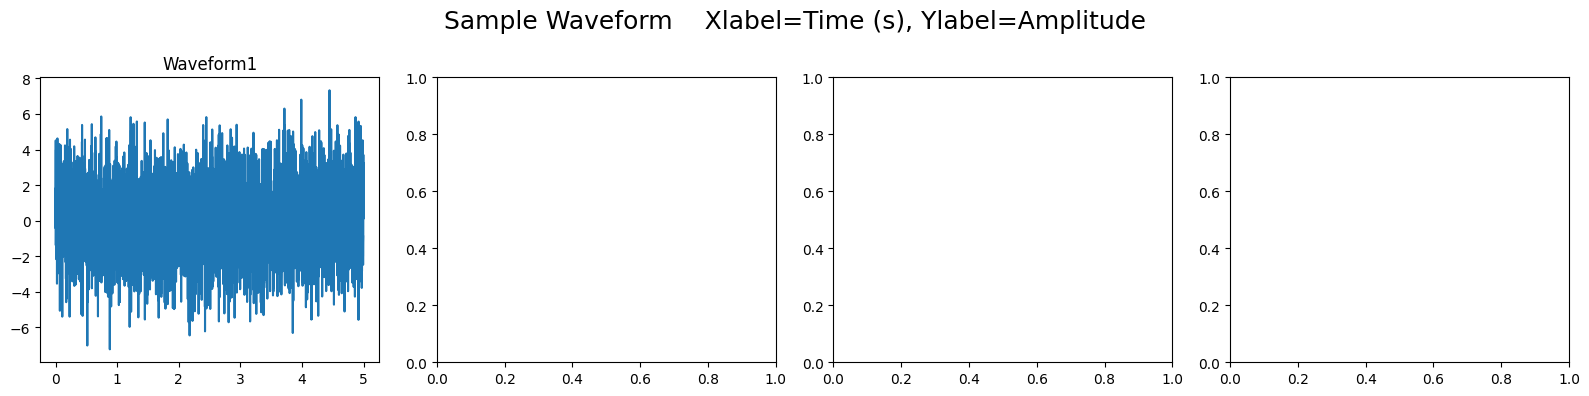

In [ ]:
# データ数と波の情報を入力する関数
def input_wave_data():
    f_sample = []
    n_sample = []
    wave_sample = []

    num = input("重ね合わせたい波の数を入力してください。 >>>")

    try:
        num = int(num)
    except ValueError:
        print("無効な入力です。整数を入力してください。")
        return input_wave_data()

    for z in range(num):
        f_z = float(input(str(z + 1) + "つ目の波の周波数を入力してください。 >>>"))
        n_z = float(input(str(z + 1) + "つ目の波の振幅の係数の大きさを入力してください。 >>>"))

        wave_type = input(
            str(z + 1) + "つ目の波の波形を入力してください。 Sin波:1 Cos波:その他のキーを入力してください。 >>>"
        )
        if wave_type == "1":
            w_z = n_z * np.sin(2 * np.pi * f_z * t)
        else:
            w_z = n_z * np.cos(2 * np.pi * f_z * t)
        wave_sample.append(w_z)

    return wave_sample


# 波形を合成する関数
def compose_waveforms(wave_sample):
    is_y = input(f"データ数分の乱数を波に合成しますか？(y/n) >>>")

    if is_y.lower() == "y":
        n_amp = float(input("乱数の振幅の係数の大きさを入力してください。 >>>"))
        w_random = n_amp * np.random.randn(N)
        wave_sample.append(w_random)
    else:
        print("了解しました。")

    y = sum(wave_sample)
    return y


# 波形を表示する関数
def display_waveforms(wave_sample, t):
    print("合成前の波形をそれぞれ表示します。")
    fig_num = len(wave_sample)
    cols = 4  # 1行あたりの最大サブプロット数
    rows = (fig_num + cols - 1) // cols  # サブプロットの行数

    fig, ax = plt.subplots(rows, cols, figsize=(16, rows * 4))
    plt.subplots_adjust(hspace=0.5, wspace=0.3)
    plt.suptitle("Sample Waveform    Xlabel=Time (s), Ylabel=Amplitude", fontsize=18)

    for i, a in enumerate(wave_sample):
        plt.subplot(rows, cols, i + 1)
        plt.plot(t, a)
        plt.title("Waveform" + str(i + 1))

    plt.tight_layout()
    plt.show()


# メインの処理
t = np.linspace(0, 5, 5000) # ここの値を調節すると時間の長さを変えられる。
N = len(t)

# 波形の入力
wave_sample = input_wave_data()

# 波形の合成
y = compose_waveforms(wave_sample)

# 波形の表示
display_waveforms(wave_sample, t)


すべての波を合成した波形を表示

すべての波を合成した波形を表示します。


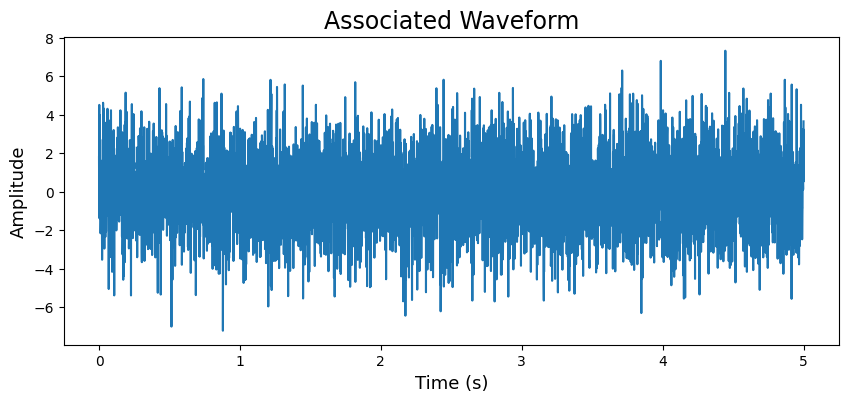

In [ ]:
print("すべての波を合成した波形を表示します。")
plt.figure(figsize=(10, 4))
plt.plot(t, y)
plt.title("Associated Waveform", fontsize=17)
plt.xlabel("Time (s)", fontsize=13)
plt.ylabel("Amplitude", fontsize=13)
plt.show()

# サンプリングレートの修正（44100Hzは一般的な値）
disp.Audio(y, rate=44100)


時間を区切って波形表示

合成後の波形を時間を区切って表示します。
0秒から何秒後までの波形を表示したいか入力してください。 >>>1


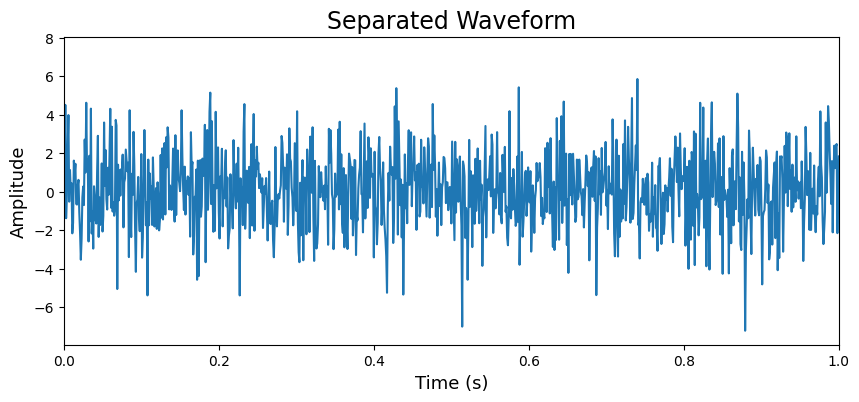

In [ ]:
print("合成後の波形を時間を区切って表示します。")

while True:
    try:
        x_lim = float(input("0秒から何秒後までの波形を表示したいか入力してください。 >>>"))
        if x_lim <= 0:
            raise ValueError("正の数を入力してください。")
        break  # 正しい値が入力されたらループを抜ける
    except ValueError as e:
        print(f"エラー: {e}")

plt.figure(figsize=(10, 4))
plt.plot(t, y)
plt.xlim(0, x_lim)  # 時間を絞って見ている
plt.title("Separated Waveform", fontsize=17)
plt.xlabel("Time (s)", fontsize=13)
plt.ylabel("Amplitude", fontsize=13)
plt.show()


FFTの結果を表示

最後に高速フーリエ変換の結果を表示します。


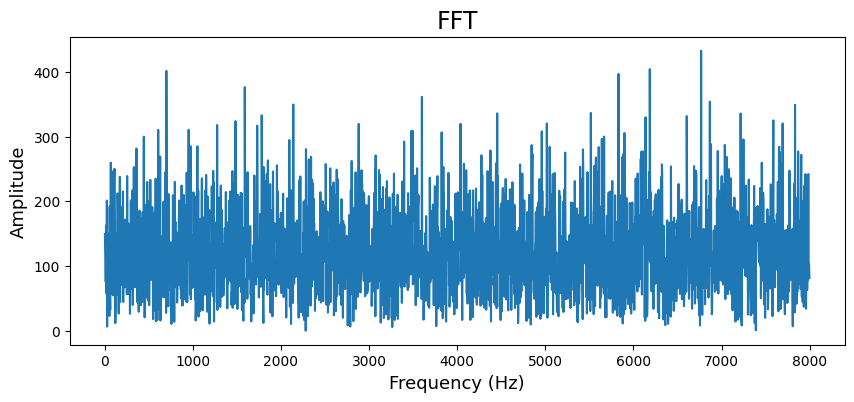

In [ ]:
# FFT
print('最後に高速フーリエ変換の結果を表示します。')

F = np.fft.fft(y)
freq = np.fft.fftfreq(N, d=1/16000) # (データ数, dt)。サンプリング周波数は好きに変えてよい。
Amp = np.abs(F) # #振幅スペクトルを取るため、絶対値にする

plt.figure(figsize=(10, 4))
plt.plot(freq[1:int(N/2)], Amp[1:int(N/2)]) # int(N/2)はナイキスト周波数の関係で入れておく
plt.title('FFT', fontsize=17)
plt.xlabel('Frequency (Hz)', fontsize=13)
plt.ylabel('Amplitude', fontsize=13)
plt.show()


#高速フーリエ変換 実データ版

標準の波形表示

データ数は29355個です。


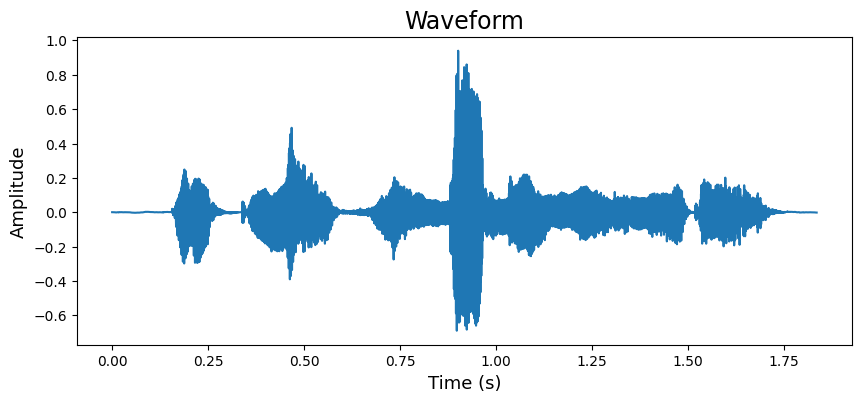

In [ ]:
wav, sr = lr.load(filename, sr=None)

t = np.arange(0, len(wav)) / sr

print(f"データ数は{len(wav)}個です。")

plt.figure(figsize=(10, 4))
plt.plot(t, wav)
plt.title("Waveform", fontsize=17)
plt.xlabel("Time (s)", fontsize=13)
plt.ylabel("Amplitude", fontsize=13)
plt.show()

disp.Audio(filename)


時間で区切った波形を表示

何秒から何秒までの波形を表示しますか？
何秒から >>>1
何秒まで >>>1.2
データ数は3199個です。


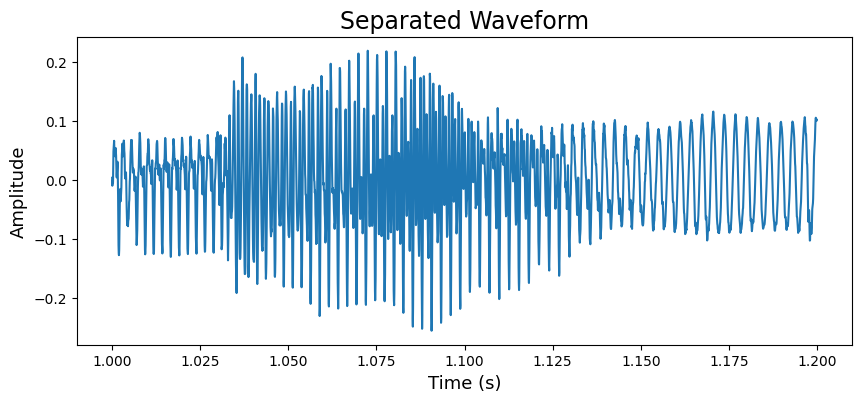

In [ ]:
print("何秒から何秒までの波形を表示しますか？")

while True:
    try:
        x_lim1 = float(input("何秒から >>>"))
        x_lim2 = float(input("何秒まで >>>"))

        if x_lim2 <= x_lim1:
            raise ValueError("終了時間は開始時間より後である必要があります。")

        length = x_lim2 - x_lim1
        wav2, sr2 = lr.load(filename, sr=None, offset=x_lim1, duration=length)
        t2 = np.arange(0, len(wav2)) / sr2 + x_lim1

        print(f"データ数は{len(wav2)}個です。")

        plt.figure(figsize=(10, 4))
        plt.plot(t2, wav2)
        plt.title("Separated Waveform", fontsize=17)
        plt.xlabel("Time (s)", fontsize=13)
        plt.ylabel("Amplitude", fontsize=13)
        plt.show()
        break
    except ValueError as e:
        print(f"エラー: {e}")

disp.Audio(data=wav2, rate=sr2)


必要なデータ点数のみ使用

何秒からの波形を表示しますか？
何秒から >>>1
2の何乗のデータを使用しますか？ >>>10
データ数は1024個です。


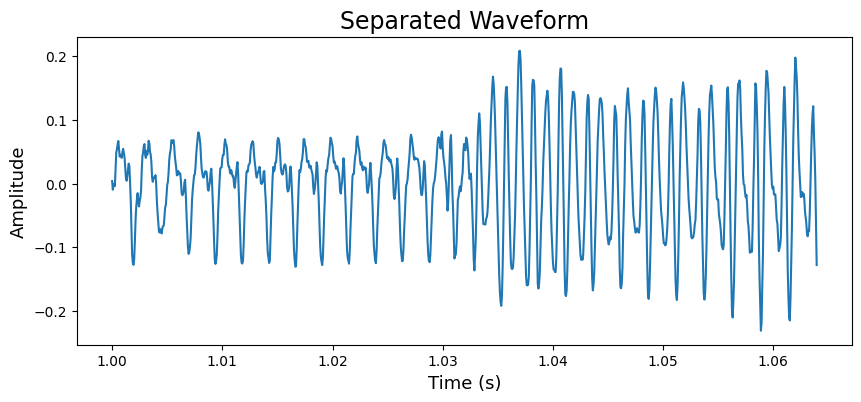

In [ ]:
print("何秒からの波形を表示しますか？")

while True:
    try:
        x_lim3 = float(input("何秒から >>>"))
        power = float(input("2の何乗のデータを使用しますか？ >>>"))

        if power.is_integer() and power > 0:
            length = 2**power * (1 / 16000)
            wav3, sr3 = lr.load(filename, sr=None, offset=x_lim3, duration=length)
            t3 = np.arange(0, len(wav3)) / sr3 + x_lim3

            print(f"データ数は{len(wav3)}個です。")

            plt.figure(figsize=(10, 4))
            plt.plot(t3, wav3)
            plt.title("Separated Waveform", fontsize=17)
            plt.xlabel("Time (s)", fontsize=13)
            plt.ylabel("Amplitude", fontsize=13)
            plt.show()
            break
        else:
            raise ValueError("2の何乗かつ正の整数を入力してください。")
    except ValueError as e:
        print(f"エラー: {e}")

disp.Audio(data=wav3, rate=sr3)

FFTの結果を表示

FFTとは高速フーリエ変換（Fast Fourier Transform）のことで、こういった音声データなどの離散的なデータを扱う通常の離散フーリエ変換（DFT）よりも高速に計算が行えるアルゴリズムのことです。

**<p align="center">高速フーリエ変換の式</p>**

$$
X[k] = \sum_{n=0}^{N-1} x[n] \cdot e^{-i \frac{2\pi}{N}kn}
$$

- \( x[n] \) は離散時間信号（離散的なサンプル）
- \( X[k] \) は FFT の結果
- \( N \) はサンプル数
- \( k \) は周波数インデックス（0 から N-1 までの整数）

FFT は、N 個のサンプルから成る離散信号を N/2 個の複素数から成る周波数成分に変換していて、計算量は O(N log N)となっているので、データサイズが増えても計算量があまり増加しません。

これによって従来の DFT と比べて計算量を \(O(N^2)\) から \(O(N \log N)\) に減少させられるので、大量の計算が必要になる大規模データやリアルタイム処理においてよく用いられています（数十倍から数百倍高速）。

FFT も DFT の一種で非周期的な離散データを扱うので、結果から導かれる周波数特性は離散的なものになります。

どちらの音声をフーリエ変換しますか？
元の音声ファイル:1 時間で区切った音声ファイル:2 必要なデータ数のみのデータ:その他のキーを入力してください。 >>>1
振幅スペクトルを表示します。
最大振幅: 112.11711951104026
最小振幅: 0.002156860320887937
最大周波数: 7999.727474024868
最小周波数: -7999.727474024868


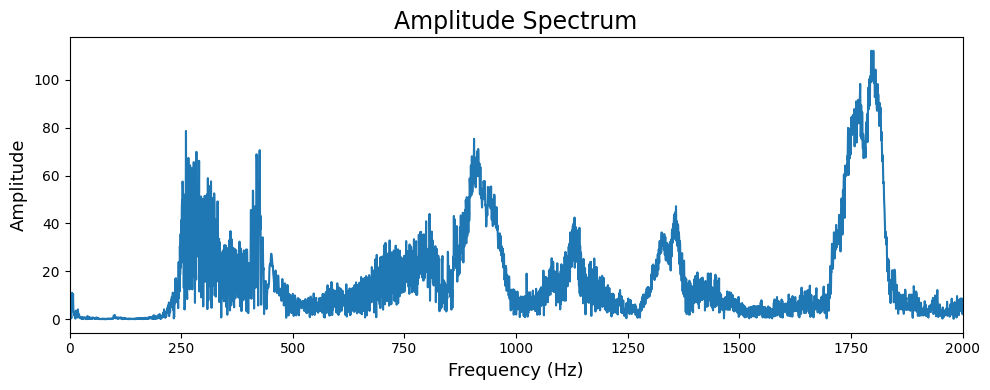

In [ ]:
print('どちらの音声をフーリエ変換しますか？')
is_input = input('元の音声ファイル:1 時間で区切った音声ファイル:2 必要なデータ数のみのデータ:その他のキーを入力してください。 >>>')

if is_input == '1':
    wave_sample = wav
elif is_input == '2':
    wave_sample = wav2
else:
    wave_sample = wav3

wave_sample1 = wave_sample * np.hamming(len(wave_sample))
fft = np.fft.fft(wave_sample1)
n = fft.size
amp = np.abs(fft)
freq = np.fft.fftfreq(n, d=1/sr)

x_lim = 2000 # 周波数帯の上限

print('振幅スペクトルを表示します。')
print(f'最大振幅: {amp.max()}')
print(f'最小振幅: {amp.min()}')
print(f'最大周波数: {freq.max()}')
print(f'最小周波数: {freq.min()}')

plt.figure(figsize=(10, 4))
plt.plot(freq[:n//2], amp[:n//2])
plt.xlim(0, x_lim)
plt.title('Amplitude Spectrum', fontsize=17)
plt.xlabel('Frequency (Hz)', fontsize=13)
plt.ylabel('Amplitude', fontsize=13)
plt.tight_layout()
plt.show()


対数振幅スペクトルも表示（上記のデータを使用）

上記の振幅スペクトルにおいて縦軸を対数で取ったものは対数振幅スペクトルと呼ばれます。音の場合の単位量はデシベル（dB）になります。

なお、デシベル単位の振幅と通常の振幅の関係性は以下の式で表される。

$$
A_{\text{dB}} = 20 \log_{10}\left(\frac{A}{A_{\text{ref}}}\right)
$$

- \( A_{\text{dB}} \) はデシベル単位の振幅
- \( A \) は元の振幅
- \( A_{\text{ref}} \) は基準振幅

デシベル単位の振幅は、元の振幅と基準振幅の比率の対数で表現されるということです。

対数振幅スペクトルを表示します。


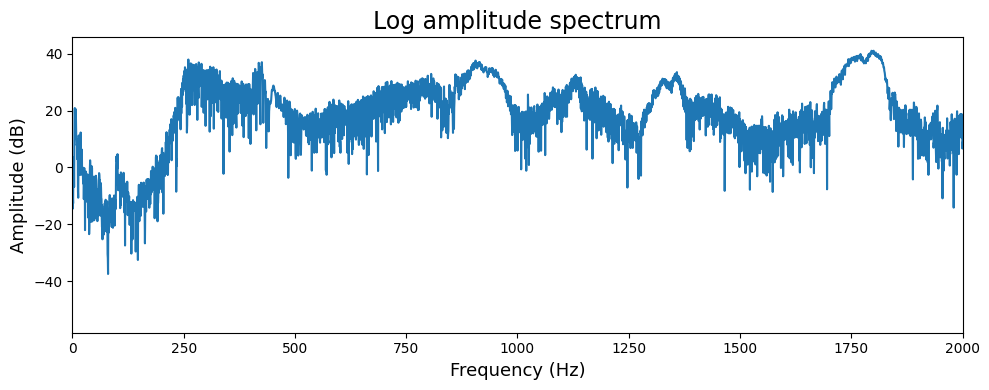

In [ ]:
# デシベルで軸をとる
de = 20 * np.log10(amp)

print('対数振幅スペクトルを表示します。')

plt.figure(figsize=(10, 4))
plt.plot(freq[:n//2], de[:n//2])
plt.xlim(0, x_lim)
plt.title('Log amplitude spectrum', fontsize=17)
plt.xlabel('Frequency (Hz)', fontsize=13)
plt.ylabel('Amplitude (dB)', fontsize=13)
plt.tight_layout()
plt.show()


スペクトログラムの描写

スペクトログラムを表示します。


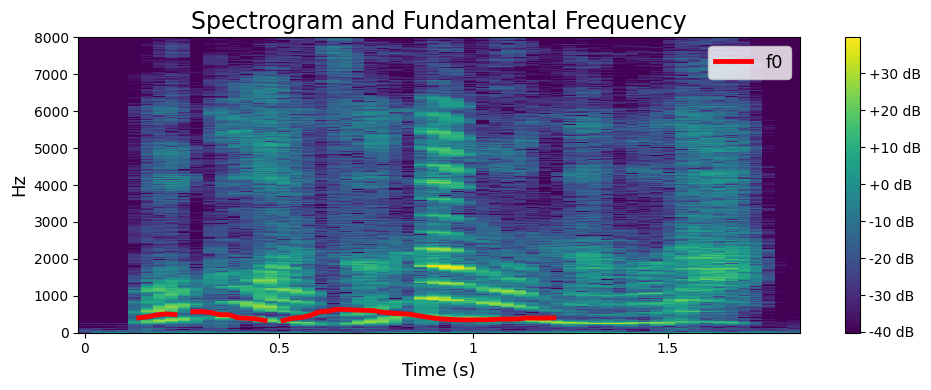

In [ ]:
# 上のFFTの結果を元にスペクトログラムが描写されます。

y_lim1 = 8000
y_axis = "hz"  # 'log'もあり

stft = lr.stft(wave_sample)  # ここに窓をかける
amps = np.abs(stft)
spectrogram = lr.amplitude_to_db(amps)  # ref=np.maxで軸を設定

print("スペクトログラムを表示します。")

f0, voiced_flag, voiced_probs = lr.pyin(
    wav, fmin=lr.note_to_hz("C2"), fmax=lr.note_to_hz("C7")
)
times = lr.times_like(f0)
fig, ax = plt.subplots(figsize=(10, 4))
img = libdisp.specshow(spectrogram, sr=sr, x_axis="time", y_axis=y_axis, cmap="viridis")
ax.plot(times, f0, label="f0", color="red", linewidth=3.5)
bar = plt.colorbar(img, ax=ax, format="%+2.0f dB")
ax.set_title("Spectrogram and Fundamental Frequency", fontsize=17)
plt.xlabel("Time (s)", fontsize=13)
plt.ylabel("Hz", fontsize=13)
ax.legend(loc="upper right", fontsize=13)
ax.set_ylim(0, y_lim1)
plt.tight_layout()
plt.show()  # F0は声の基本周波数のこと。


# おまけ：音声の加工
音声ファイルのピッチや再生速度を変更して遊べます。

デフォルトの音声ファイルを読み込みます。

In [ ]:
audio1, sr1 = lr.load(filename,sr=None)
print(f'データ数は{len(audio1)}個です。')

print('音声ファイルを再生します。')

disp.Audio(data=audio1, rate=sr1)


データ数は29355個です。
音声ファイルを再生します。


ピッチを変更して遊べます。

In [ ]:
print('ピッチを変更します。')
pitch = input('ステップ数を決定します。ピッチを高くしたい場合は正、低くしたい場合は負の値を整数値で入力してください。 >>>')
audio1_pitch = lr.effects.pitch_shift(audio1, sr=sr1, n_steps=float(pitch))

print(f'データ数は{len(audio1_pitch)}個です。')

disp.Audio(data=audio1_pitch, rate=sr1)


ピッチを変更します。
ステップ数を決定します。ピッチを高くしたい場合は正、低くしたい場合は負の値を整数値で入力してください。 >>>5
データ数は29355個です。


再生速度を変更して遊べます。

In [ ]:
time_play = input('再生速度を早くしたい場合は1より大きい値を、遅くしたい場合は1より小さい値を入力してください。 >>>')
audio2_time = lr.effects.time_stretch(audio1_pitch, rate=float(time_play))

print(f'データ数は{len(audio2_time)}個です。')

disp.Audio(data=audio2_time, rate=sr1)


再生速度を早くしたい場合は1より大きい値を、遅くしたい場合は1より小さい値を入力してください。 >>>0.1
データ数は293550個です。
